# Lab 12 – Hyperparameter tuning

Name 1: Kartikeya Sharma <br/>Name 2: Me, Myself, and I<br/>Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2021  
Instructor: Brian King  

# Objectives

This lab will introduce the student to understanding hyperparameters, and getting a sense of how to tune them. Specifically, the objectives are as follows:

- Understand the impact of hyperparameters with model induction and performance
- Learn to use the GridSearchCV class to find good parameters for your model

--- 
# Background
You were introduced to Keras deep learning framework in the last lab. You also learned how to use the Keras wrapper class, KerasClassifier, so that you could continue to use the wonderful scikit-learn framework for data mining and machine learning, leveraging Keras within the environment you know. You also learned that there are an enormous number of parameters to consider to get a good result! Yeah, you could do it manually by creating multiple loops to evaluate different model parameters, or you could use the scikit-learn's framework to do this.

## What is hyperparameter tuning
The real focus of this lab is to learn how to use the `scikit-learn` framework to assist you with hyperparameter tuning.  Every machine learning model has parameters that control model induction. They are generally referred to hyperparamters, and you need to optimize them for your given problem. The parameters usually come down to figuring out how to control the complexity of your model such that it is able to learn from your data, but not overfit. (Recall our bias vs. variance tradeoff discussion!) Understanding this is critical. Understanding how to address it is even better, and is an important skill to learn. You will in this lab.

Generally, there are two approaches you can take to hyperparameter tuning. You could write an enormous number of loops yourself to track the model parameters you are experimenting with and keep track of the model performances coming from each parameter set. Or, you can use a grid search framework to search for the parameters. That's the purpose of `scikit-learn`'s `GridSearchCV` class.

>WARNING: Hyperparameter tuning can use a LOT of computational resources, both CPU and memory! Depending on how you set up your test, and the complexity of the model being evaluated, you could be waiting days for a result! So, ALWAYS start with a simple setup (small data sample, limited number of parameters to test) before you run an exhaustive grid search for your optimal parameters!

## Preparing for this lab

Some of this lab is modeled after some code given in a few different web sites, and you might get more out of the lab by taking a few minutes to skim through these pages, just to understand the framework you are going to be using to perform a grid-search for optimal hyperparameters. You might even want to just keep these pages open in your browser.

- First, the most important page you'll need is the reference to GridSearchCV: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- The best example code can be found right on the scikit-learn site:
    - https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html  
- The user guide has an exhaustive writeup covering the topic of hyper-parameter tuning. This has a *lot* of good information, some of which is far more advanced than anything you need at this time:
    - https://scikit-learn.org/stable/modules/grid_search.html
- The following page illustrates a bit simpler code to get you started, however, note that it uses the `Sequential` model, vs. using the *Functional API*:
    - https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/. 

That's it!

In [1]:
# This magic command just allows the autocomplete <TAB> 
# feature to work properly.
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier

In [3]:
print(tf.__version__)

2.4.1


In [4]:
print(keras.__version__)

2.4.0


***
# The classic Wine dataset
There have been *many* datasets appearing over the past 15 years or so that attempt to try and capture numerous objective measures to characterize wine. An often-used dataset for classification exercises is the infamous wine dataset from the early 1990s. Not quite as popular as iris, but pretty close. It's a bit more complex than iris, with 13 variables and 1 target multi-class variable, an no model has obtained near 100% accuracy on validation. However, we can usually get in the mid 90s on the best models.

### Reading in the wine data

Open the following page:
* https://archive.ics.uci.edu/ml/datasets/wine 

This page will give you the data and the information you need to start this lab.  (If you prefer, it is also one of the built-in datasets available in `sklearn.datasets` package (see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html ). Either way, you need to first convert this to a pandas data frame. 

The following code will read in the data from the UCI machine learning site, as a data frame in its raw form:

```
names = ["target","alcohol","malic_acid","ash","alcalinity","Mg","tot_phenols","flavanoids",
         "non_flav_phenols","proanthocyanins","color_intensity",
         "hue","OD","proline"]

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=names)
```

This is the first lab that is provided as an unanswered .ipynb file to help you focus on the work and not get caught up in dealing with formatting. You've got the formatting down, so focus on really absorbing this material. This lab is a culminating experience that represents the type of analyses you will do if you do this in "the real world." And likewise, this is a bit more "hands off" than the previous lab was. On the bright side, I chose a dataset that has  many, many published examples already that demonstrate reading and modeling these exact data.

>NOTE: As usual, with all of the popular datasets, there are many examples available online that can help you understand the data, clean the data, generate EDA plots to understand the distributions, etc. I encourage you to search for code to generate some reasonable plots with these data! (And, include all URLs that you use!)

***
**1)** Read in the wine data frame using the code given above. It also gives you the names of the variables, which should be the same as the data information given on the UCI web page. Store your result as `df_wine`.

In [5]:
names = ["target","alcohol","malic_acid","ash","alcalinity","Mg","tot_phenols","flavanoids",
         "non_flav_phenols","proanthocyanins","color_intensity",
         "hue","OD","proline"]

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=names)

***
**2)** Prepare your data. Over multiple code cells, minimally, you should be reporting:
-	`shape`, `info()`, etc
-	Cast the type of each variables into its most correct type, paying special attention to the target class (which for these data sis called `target`, and should be a categorical variable). Fortunately, these are already going to read in mostly correct.
-	Report on any missing data. (There shouldn't be any.)
-	Show the `head()` of the data frame



In [6]:
df_wine.shape

(178, 14)

We have 14 variables, including the 13 independent vairables and the one target class variable, which is good. 178 data points, which matches what the data set info page says.

In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target            178 non-null    int64  
 1   alcohol           178 non-null    float64
 2   malic_acid        178 non-null    float64
 3   ash               178 non-null    float64
 4   alcalinity        178 non-null    float64
 5   Mg                178 non-null    int64  
 6   tot_phenols       178 non-null    float64
 7   flavanoids        178 non-null    float64
 8   non_flav_phenols  178 non-null    float64
 9   proanthocyanins   178 non-null    float64
 10  color_intensity   178 non-null    float64
 11  hue               178 non-null    float64
 12  OD                178 non-null    float64
 13  proline           178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Interesting that the target terrible was automatically cast to an integer variable. Let's see if there are truly only three unique integer values corresponding to the three target classes.

In [8]:
df_wine.target.unique()

array([1, 2, 3])

Well, let's turn them into a categorical. Why? Because they should be; they're norminal, which may be represented in numeric form but are surely not ordinal.

In [9]:
df_wine.target = pd.Categorical(df_wine.target, ordered=False)

Any other obvious variables with only a few unique values that may be potential categorical variables (don't think so based on the data set, but just checking in with what has been imported)?

In [10]:
df_wine.nunique()

target                3
alcohol             126
malic_acid          133
ash                  79
alcalinity           63
Mg                   53
tot_phenols          97
flavanoids          132
non_flav_phenols     39
proanthocyanins     101
color_intensity     132
hue                  78
OD                  122
proline             121
dtype: int64

Looks all right for now. Let's downcast the numeric variables. I'll do info() again, so I have it in front of me for the downcasting bit.

In [11]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   target            178 non-null    category
 1   alcohol           178 non-null    float64 
 2   malic_acid        178 non-null    float64 
 3   ash               178 non-null    float64 
 4   alcalinity        178 non-null    float64 
 5   Mg                178 non-null    int64   
 6   tot_phenols       178 non-null    float64 
 7   flavanoids        178 non-null    float64 
 8   non_flav_phenols  178 non-null    float64 
 9   proanthocyanins   178 non-null    float64 
 10  color_intensity   178 non-null    float64 
 11  hue               178 non-null    float64 
 12  OD                178 non-null    float64 
 13  proline           178 non-null    int64   
dtypes: category(1), float64(11), int64(2)
memory usage: 18.5 KB


In [239]:
for column in df_wine.columns:
    if df_wine[column].dtype==float:
        df_wine[column] = pd.to_numeric(df_wine[column], downcast='float')
    elif df_wine[column].dtype==int:
        df_wine[column] = pd.to_numeric(df_wine[column], downcast='integer')

In [13]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   target            178 non-null    category
 1   alcohol           178 non-null    float32 
 2   malic_acid        178 non-null    float32 
 3   ash               178 non-null    float32 
 4   alcalinity        178 non-null    float32 
 5   Mg                178 non-null    int16   
 6   tot_phenols       178 non-null    float32 
 7   flavanoids        178 non-null    float32 
 8   non_flav_phenols  178 non-null    float32 
 9   proanthocyanins   178 non-null    float32 
 10  color_intensity   178 non-null    float32 
 11  hue               178 non-null    float32 
 12  OD                178 non-null    float32 
 13  proline           178 non-null    int16   
dtypes: category(1), float32(11), int16(2)
memory usage: 8.8 KB


Downcasted numeric variables. Non-null are all 178; no missing data!

In [14]:
df_wine.head()

,target,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline
0,1,14.23,1.71,2.43,15.600000,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.200000,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.600000,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.799999,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.000000,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


***
**3)**
We're going to perform the essential task of EDA. First, *numerically* (not visually or graphically) summarize your data. Minimally, you at least want to:
* Output `describe()`
* Report the table of counts of the target variable
* Show the means of each variable, grouped by target value

In [15]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000619,2.336349,2.366517,19.494944,99.741573,2.295112,2.029269,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200001,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
df_wine.target.value_counts() # table of counts of the target variable

2    71
1    59
3    48
Name: target, dtype: int64

In [17]:
df_wine.groupby('target').mean() # means of each variable, grouped by target value

,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline
target,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037289,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153749,3.333750,2.437083,21.416666,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


***
**4)** Now, provide at least 3 plots of your own choosing to help visually and graphically understand the distributions of your variables. It's entirely up to you to choose and design the plots to convey important information about your data. Some ideas I always start with:
* A barchart of the target variable counts
* A boxplot of each numeric variable. Even better is a boxplot that uses a color (hue) for each target value
* Density or histogram (e.g. seaborn `kdeplot`) plots of each variable, colored by target. (HINT - `sns.FacetPlot` is ideal for this.)
* A pairwise correlation heatmap visualizing the variable correlations
* A Seaborn `pairplot`. (However, with 13 predictor variables and one target, this can get unweldy, not to mention it can take some time to generate it. Try it, and then determine if it'd be better to just select a subset of variables.

In [18]:
# This might be helpful?
df_wine_melt = df_wine.melt(id_vars=['target'])
df_wine_melt.head()

,target,variable,value
0,1,alcohol,14.23
1,1,alcohol,13.20
2,1,alcohol,13.16
3,1,alcohol,14.37
4,1,alcohol,13.24


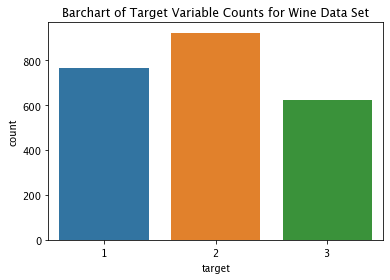

In [19]:
ax_bar = sns.countplot(data=df_wine_melt, x='target')
ax_bar.set_title("Barchart of Target Variable Counts " + \
                 "for Wine Data Set");

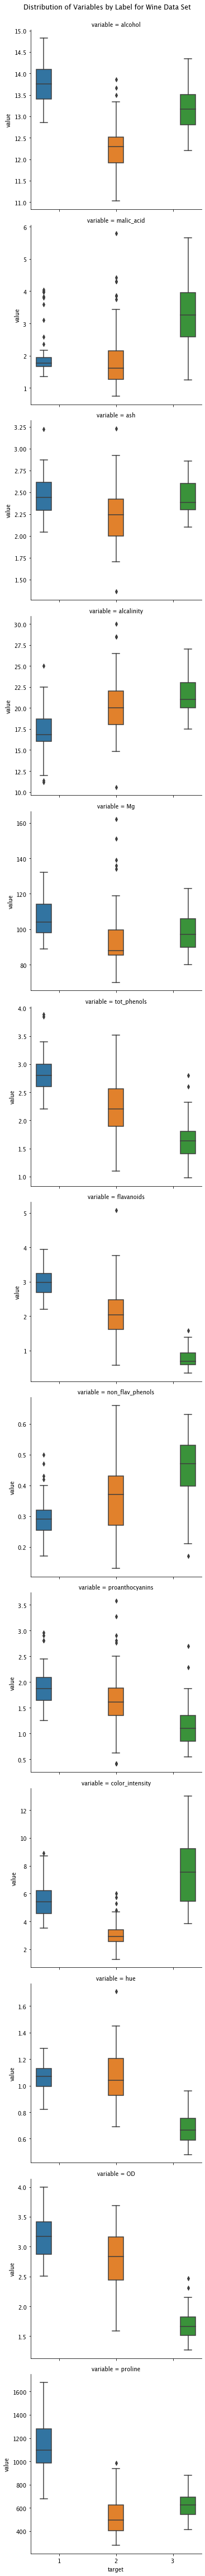

In [20]:
fg_box = sns.catplot(
    data=df_wine_melt, 
    x='target', 
    y='value', 
    hue='target',
    row='variable',
    kind='box',
    sharey=False
)

fg_box.fig.subplots_adjust(top=0.97)
fg_box.fig.suptitle("Distribution of Variables by Label " + \
                    "for Wine Data Set");

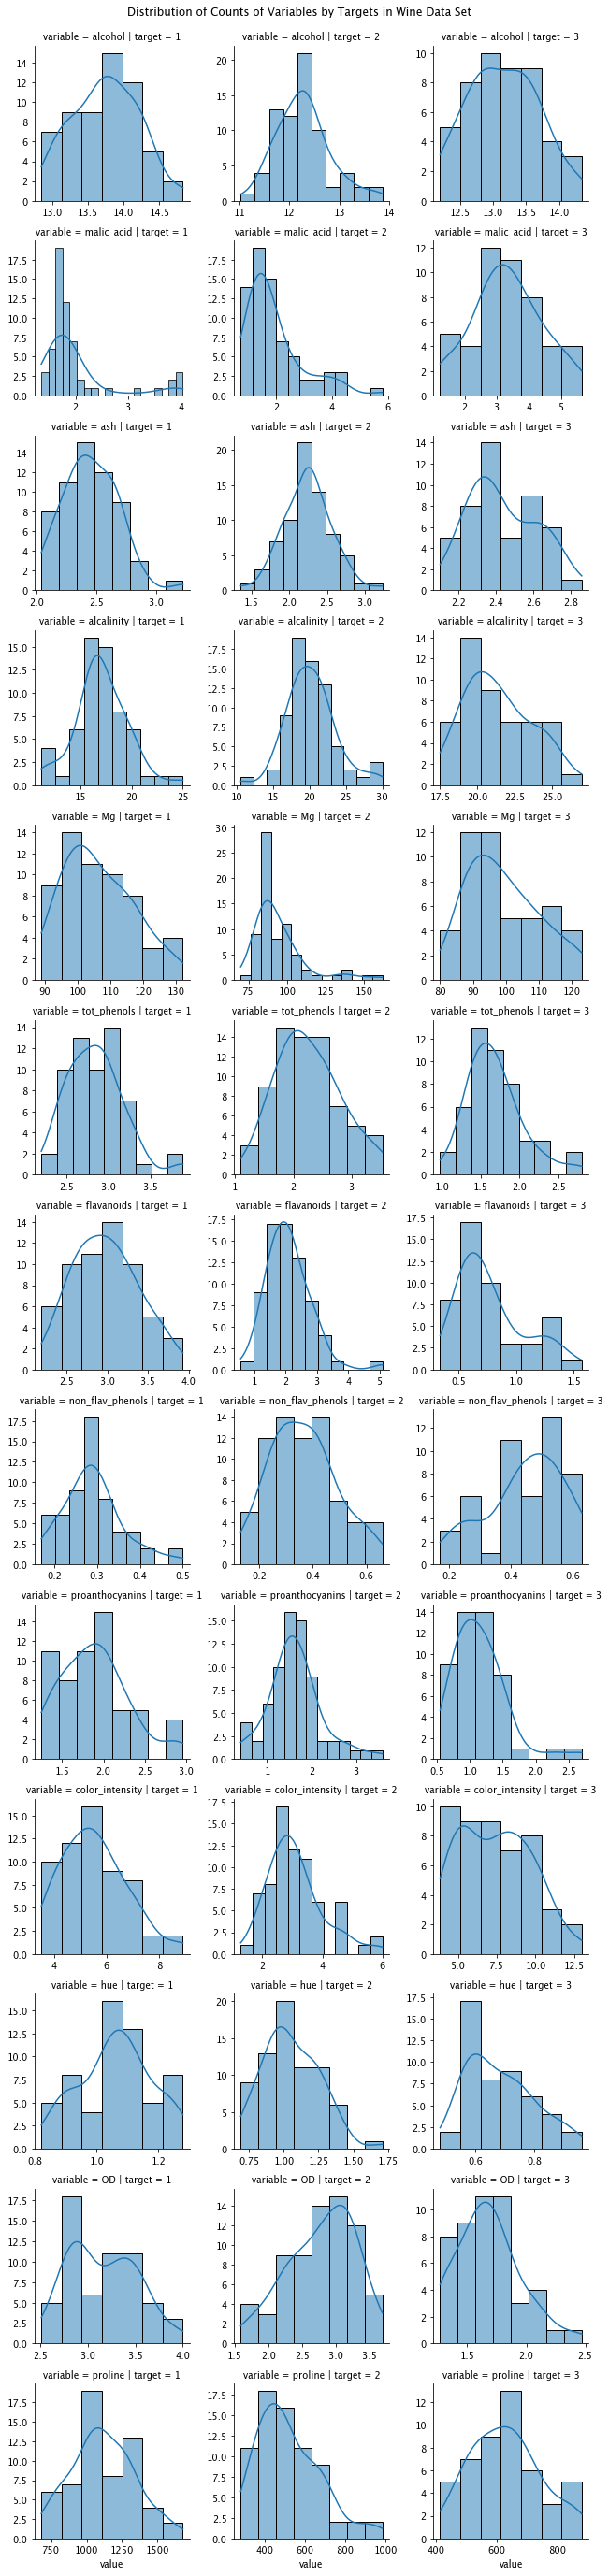

In [21]:
fg_dist = sns.FacetGrid(data=df_wine_melt,
                        row='variable',
                        col='target',
                        sharex=False,
                        sharey=False)
fg_dist.map(sns.histplot, "value", kde=True)
fg_dist.fig.subplots_adjust(top=0.965)
fg_dist.fig.suptitle("Distribution of Counts of Variables by Targets in Wine Data Set");

(Correlation heatmap given in 4b already)

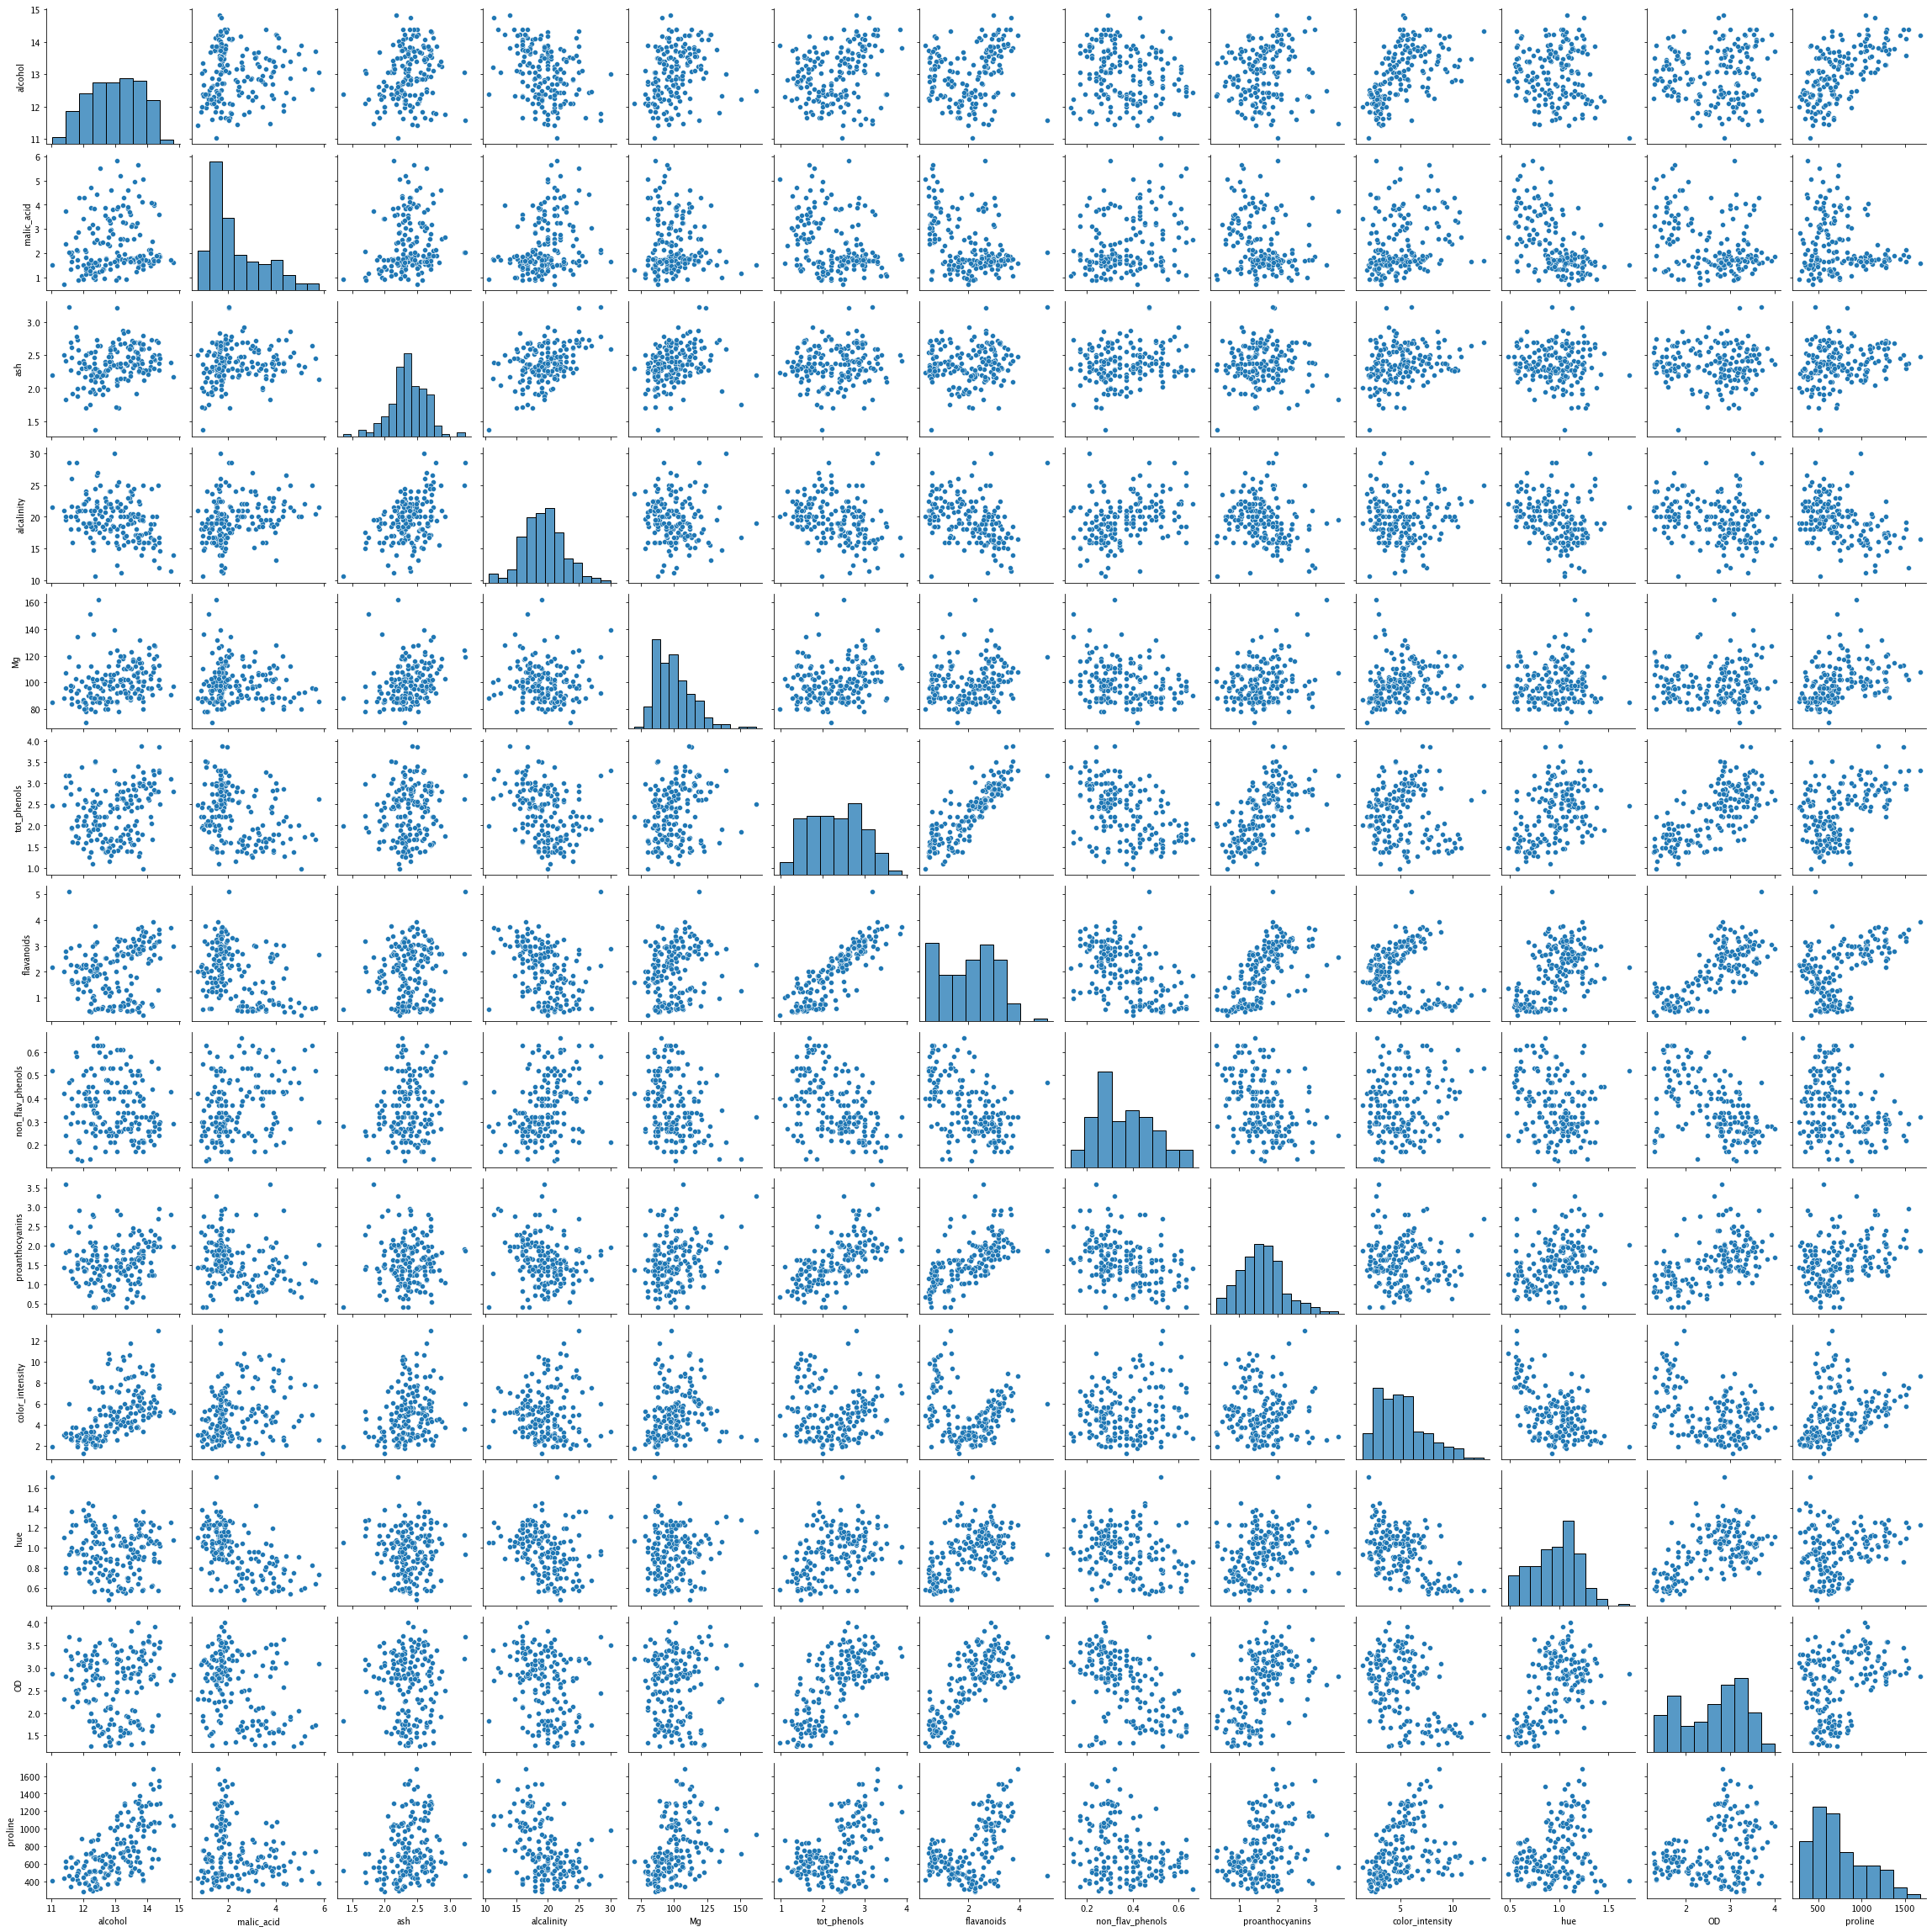

In [22]:
pg = sns.pairplot(data=df_wine)

Way too many; it would be better to select a subset of variables. Let's try to filter by rows/columns that have at least a non-1 value > 0.5, as low correlation seems to be 0.3-0.5 and moderate correlation seems to be 0.5-0.7 (depending on the statistical definitions used).

In [23]:
def _threshold_corr_col_selector(df: pd.DataFrame, threshold: float):
    df_corr = df.corr()
    # to make boolean indexing easier
    df_corr.replace(to_replace=1.0, value=0, inplace=True) 
    df_corr = df_corr[(abs(df_corr)>=threshold).any()]
    df_corr = df_corr[df_corr.index]
    sel_cols = df_corr.index # selected columns
    return sel_cols

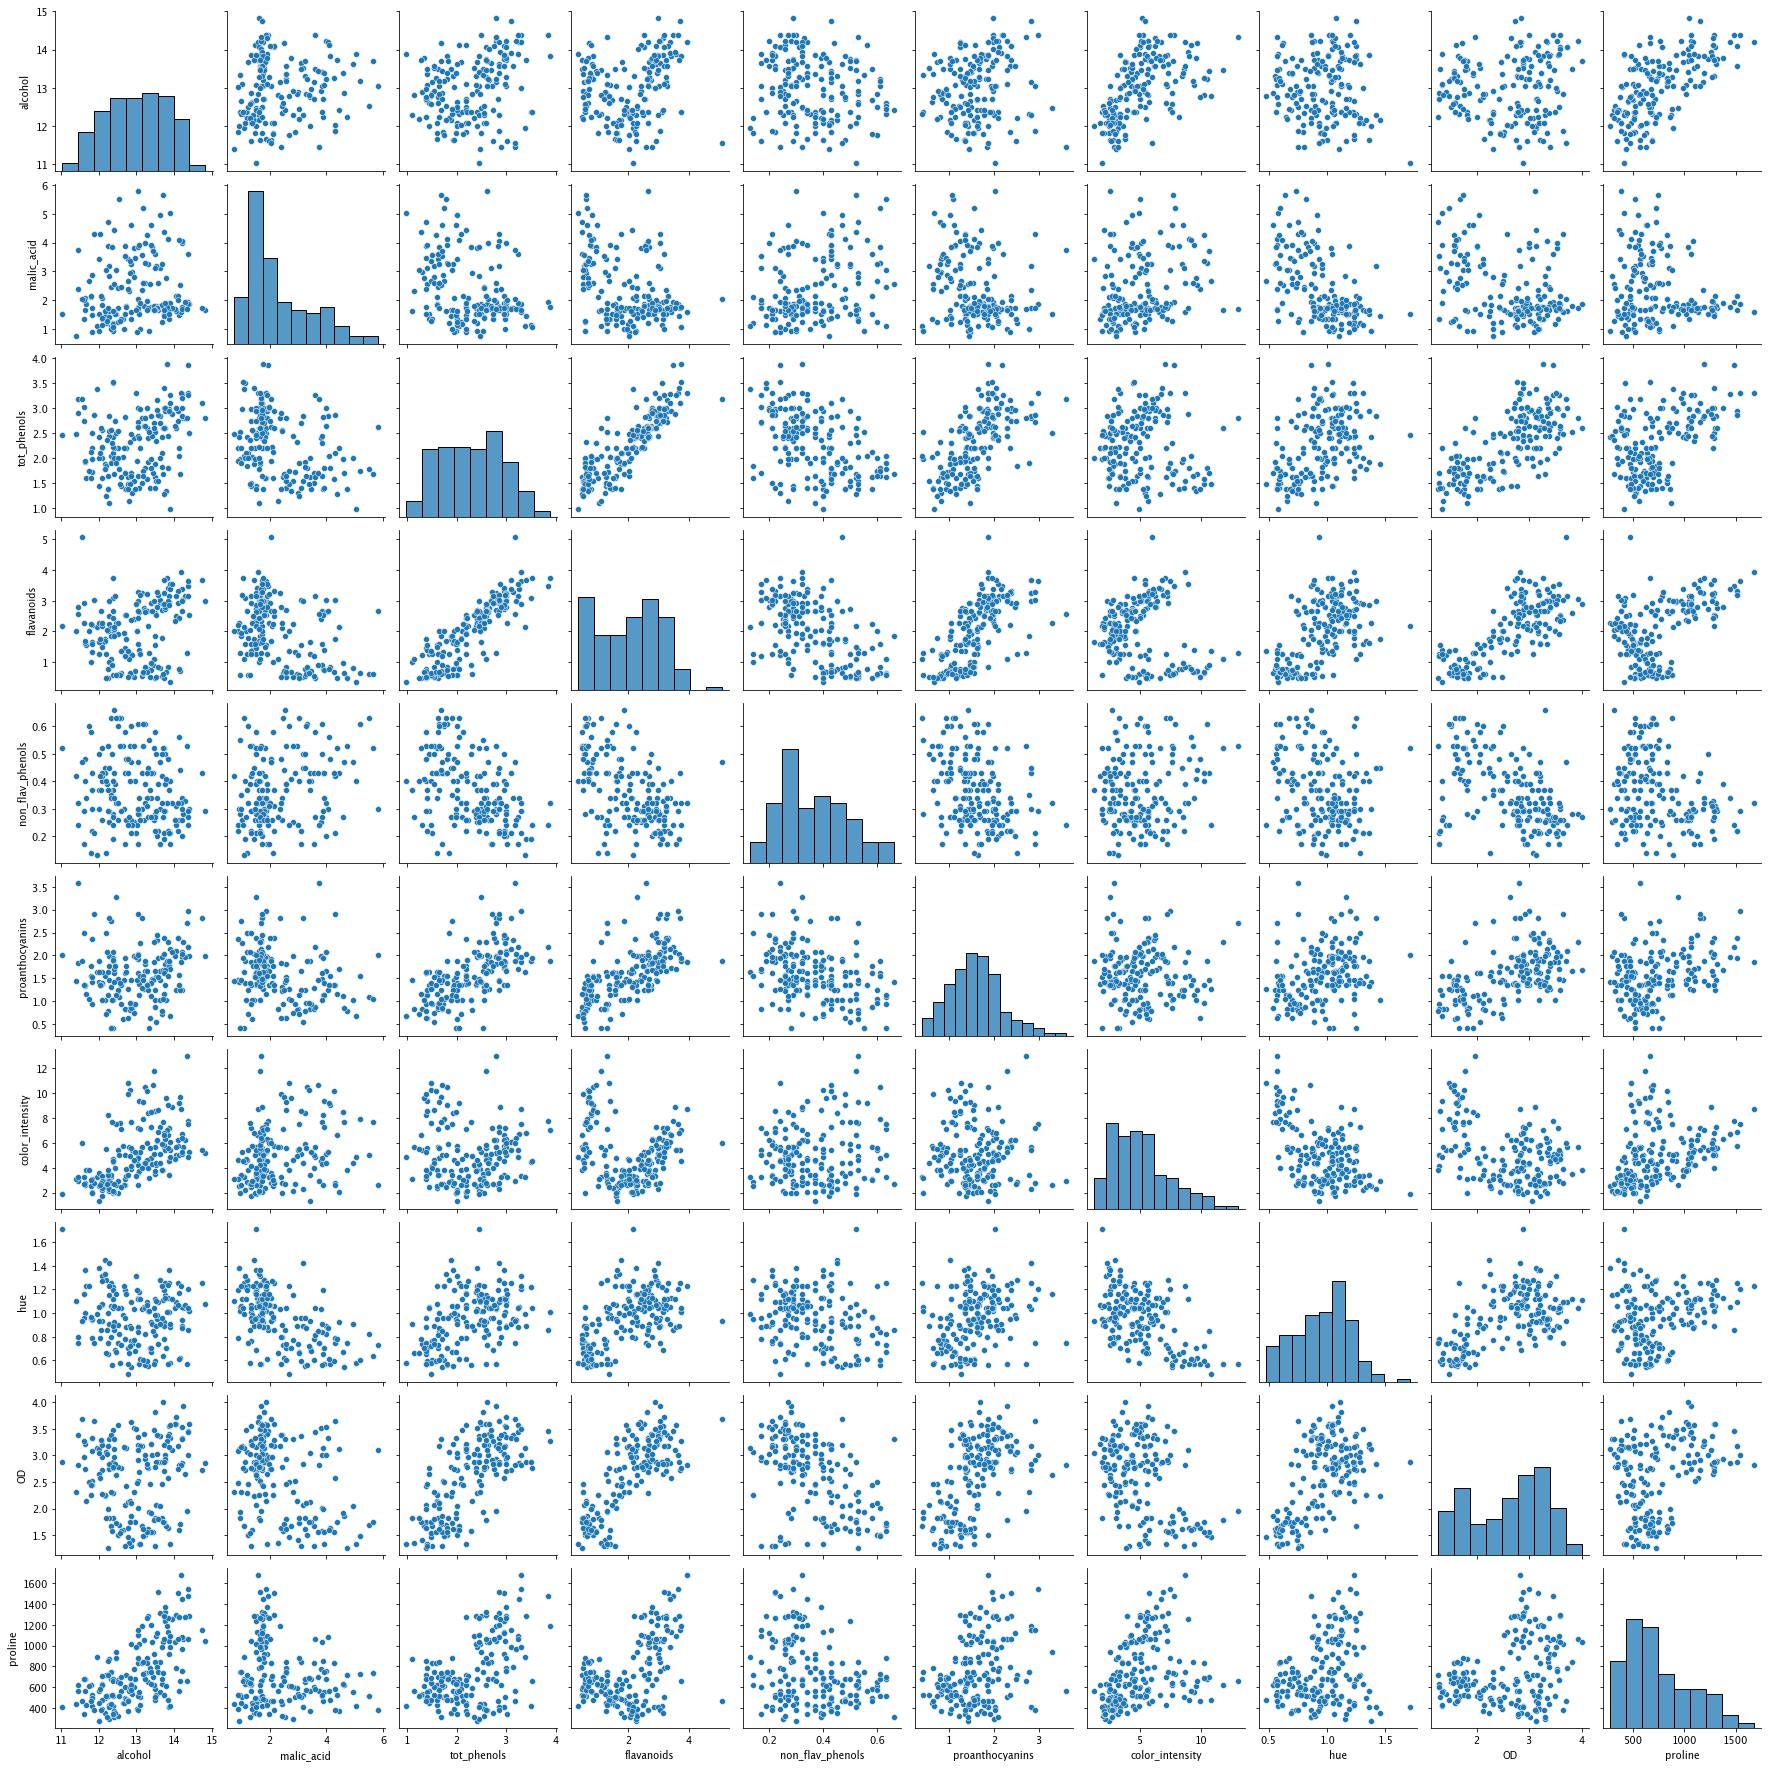

In [24]:
pg = sns.pairplot(data=df_wine[_threshold_corr_col_selector(df_wine, 0.5)])

Less than 10x10 plots?

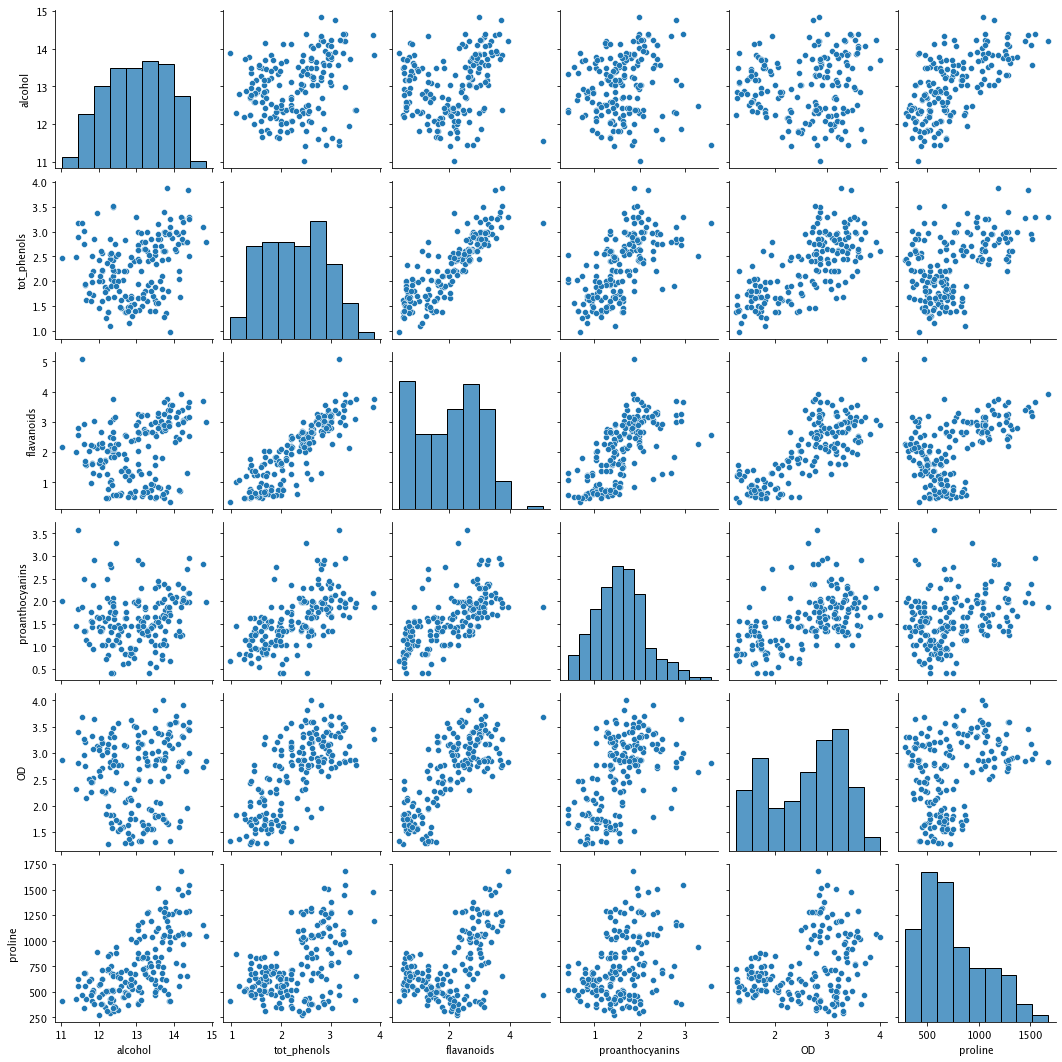

In [25]:
pg = sns.pairplot(data=df_wine[_threshold_corr_col_selector(df_wine, 0.6)])

6x6 plots is good (we can keep this). And, just for curiosity... plots with >=0.7 correlation?

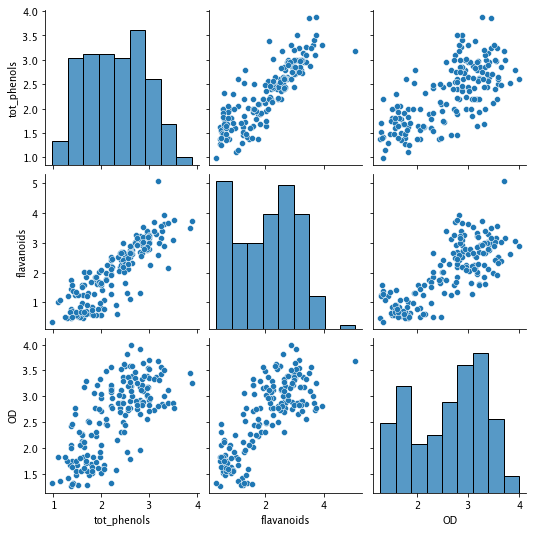

In [26]:
pg = sns.pairplot(data=df_wine[_threshold_corr_col_selector(df_wine, 0.7)])

In [27]:
df_wine_corr = df_wine.corr()
df_wine_corr.replace(to_replace=1.0, value=0, inplace=True) # to make boolean indexing easier
df_wine_corr = df_wine_corr[(abs(df_wine_corr)>=0.6).any()]
df_wine_corr = df_wine_corr[df_wine_corr.index]
sel_cols_2 = df_wine_corr.index # selected columns
df_wine_corr

,alcohol,tot_phenols,flavanoids,proanthocyanins,OD,proline
alcohol,0.000000,0.289101,0.236815,0.136698,0.072343,0.643720
tot_phenols,0.289101,0.000000,0.864564,0.612413,0.699949,0.498115
flavanoids,0.236815,0.864564,0.000000,0.652692,0.787194,0.494193
proanthocyanins,0.136698,0.612413,0.652692,0.000000,0.519067,0.330417
OD,0.072343,0.699949,0.787194,0.519067,0.000000,0.312761
proline,0.643720,0.498115,0.494193,0.330417,0.312761,0.000000


**4b) [M] What is this heatmap conveying?**

Here is one I want you to include. I'll give it to you, and you need to study and interpret what it's conveying. The cell is provided.

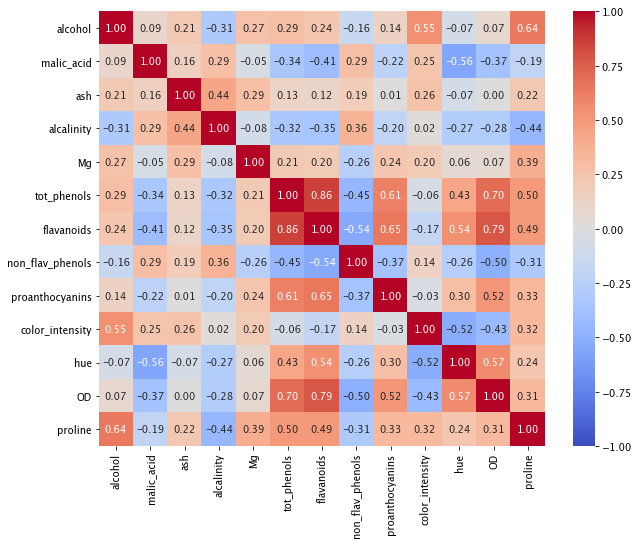

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df_wine.corr(),
            center=0, vmin=-1, vmax=1, cmap="coolwarm",
            annot=True, fmt=".2f");

ANSWER:



This heat map is conveying the strength of the linear relationships between, for any given cell, the variable whose name is listed on that cell's row and the variable whose name is listed on that cell's column. A 1 means that the two variables have a perfect positive relationship, a 0 means that the two variables have no relationship, and a -1 means that they have a perfect negative relationship. Moreover, the darkness of the color of each cell within the heatmap portrays the strength of the relationship represented by that cell, where red represents a positive relationship, white portrays no relationship, and blue connotates a negative relationship.

Of course, a variable is perfectly correlated to itself, which is why the diagonal running from top left to bottom right of the heatmap square is filled with 1's that are dark red. The following are, in descending order, some notable positive correlations (we will define notable as having a correlation coefficient of >= 0.5 or <= -0.5 per some of the general definitions for moderate, or higher, correlations).<sup>1</sup> Using >= 0.7 as a general indicator, for now, of strong, positive correlations, flavanoids and total phenols (tot_phenols) (\~0.86), flavanoids and OD280/OD315 of diluted wines (OD) (\~0.79), and OD280/OD315 of diluted wines (OD) and total phenols (tot_phenols) (\~0.70) can be seen as relatively strong, positive correlations amongst the correlations found within this wine data set.<sup>1</sup> Using 0.5 <= c < 7 as a general indicator of a moderate, positive correlation, flavanoids and proanthocyanins (\~0.65), proline and alcohol (\~0.64), and total phenols (tot_phenols) and proanthocyanins (\~0.61) are among some of the relationships that can be seen as moderate, positive correlations amongst the correlations found within this wine data set.<sup>1</sup> Other characterizable moderate, positive correlations can be seen below in Figure 1 (4b). The moderate, negative correlations in this wine data set appear to be, in descending order, malic acid (malic_acid) and hue (\~-0.56), nonflavanoid phenols (non_flav_phenols) and flavanoids (\~-0.54), hue and color intensity (color_intensity) (\~-0.52), and OD280/OD315 of diluted wines (OD) and nonflavanoid phenols (non_flav_phenols) (\~-0.50). There do not *appear* to be, according to the definitions for moderate and strong correlations provided above, strong, negative correlations amongst the variables in this wine data set. 

Sources:
1. https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf

I am using the following sorted list of correlation coefficients to supplement by anaylsis above:

In [31]:
df_wine_corr_sorted = df_wine.corr().stack().sort_values(ascending=False)
df_wine_corr_sorted[(df_wine_corr_sorted!=1) & (df_wine_corr_sorted >= 0.5)].drop_duplicates()

tot_phenols      flavanoids         0.864564
OD               flavanoids         0.787194
                 tot_phenols        0.699949
proanthocyanins  flavanoids         0.652692
proline          alcohol            0.643720
proanthocyanins  tot_phenols        0.612413
OD               hue                0.565468
color_intensity  alcohol            0.546364
hue              flavanoids         0.543479
OD               proanthocyanins    0.519067
dtype: float64

Figure 1 (4b). Moderate/strong positive correlations amongst correlations in this wine data set.

In [32]:
df_wine_corr_sorted.sort_values(ascending=True, inplace=True)
df_wine_corr_sorted[(df_wine_corr_sorted!=1) & (df_wine_corr_sorted <= -0.5)].drop_duplicates()

malic_acid        hue                -0.561296
non_flav_phenols  flavanoids         -0.537900
hue               color_intensity    -0.521813
OD                non_flav_phenols   -0.503270
dtype: float64

Figure 2 (4b). Moderate negative correlations amongst correlations in this wine data set.

**4c)** [M] Look up Seaborn's clustermap function. What is this conveying? Are there similarities to the previous heatmap? (This is a bit of a taste of our last topic we will cover on clustering data.) https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap

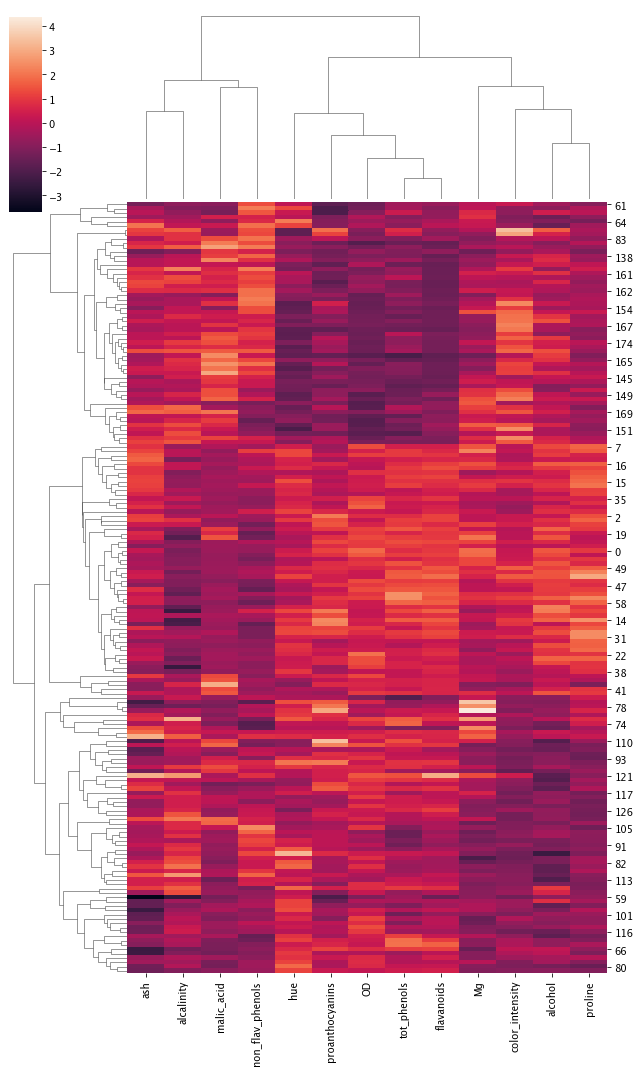

In [33]:
sns.clustermap(df_wine.iloc[:,1:],row_cluster=True,col_cluster=True,
               z_score=1,metric="correlation",
               figsize=(9,15));

ANSWER:

A hierarchically-clustered heatmap places similar variables next to each other amongst the columns and indices of similar data points next to each other amongst the rows and their associated data point indices. There are multiple algorithms to determine similarities, one of which involves placing two rows/columns next to each other based upon smallest average distance between a row/column and another fellow row/column. The hierarchical structure groups more closely related rows/columns lower/nearer to one another in hierarchy and the outer branches establish which sets of rows/columns are progressively further related from other rows/columns. The hue of each cell corresponds to the z-score of a value of a particular variable within a particular data point with respect to the other data points within that particular variable; the hue corresponds to the z-score indicated in the hue at the top-left corner of the hierarchically-clustered heatmap above.

A hierarchically-clustered heatmap and a correlation coefficient heat map are both similar in the sense that they both attempt to visually capture the closeness of the relationship between multiple variables. In a general sense, it appears that a high closeness of z-scores/similarity between any two columns demonstrates that the data points with higher values in one variable, for instance, also tend to have higher values in the other variable (at least relative to any other variables) with respect to each variable's distribution, which would, at least visually, make these two variables fairly more correlated to one another than any of the other variables are to it. So, one could say that hierarchically-clustered heatmaps and correlation coefficient heatmaps both demonstrate similarness and correlativeness amongst variables.

Sources:
1. https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Clustered_Heat_Maps-Double_Dendrograms.pdf

***
**5)**	Set up your `X` and `y` data frames to prepare for your modeling steps. Be sure to normalize your `X` variables. (Use z-score transform. Any approach will do, but `StandardScaler()` keeps in you the scikit-learn world.) Be sure to create a binarized version of `y` as well, called `y_bin` or `y_ohe`. Just don't delete the original `y`. Be sure you shuffle your data.

NOTE: You'll need both types of y. Some classifiers work great on single target variables that are multi-class such as these data. However, others do not. You'll needed the binarized variable for neural nets! Remember, binarization is important for classifiers such as neural nets when you are working with a target variable that is multi-class (i.e. more than two labels). 

In [34]:
sclr = StandardScaler()
X = sclr.fit_transform(df_wine.drop(columns="target"))
X = pd.DataFrame(X, 
                 columns=df_wine.drop(columns="target").columns)
y = df_wine["target"]
y_bin = pd.get_dummies(y)

print("X:")
display(X)
print("y:")
display(y)
print("y_bin:")
display(y_bin)

X:


,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline
0,1.518612,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246289,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406050,1.113449,0.965242
2,0.196879,0.021231,1.109335,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788588,1.395148
3,1.691549,-0.346811,0.487926,-0.809251,0.930918,2.491445,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184072,2.334574
4,0.295700,0.227694,1.840402,0.451946,1.281985,0.808997,0.663351,0.226795,0.401405,-0.319275,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305160,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930180,1.142811,-1.392758,-1.231206,-0.021952
174,0.493342,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332759,1.744745,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


y:


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: target, Length: 178, dtype: category
Categories (3, int64): [1, 2, 3]

y_bin:


,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


***
**6a)** Let's induce a basic Decision Tree Classifier (i.e. `DecisionTreeClassifier()`). Don't set any initial parameters. Let the default tree induction parameters be used. Evaluate the tree using a 5-fold cross validation. Perform a standard report of your class-wide performance metrics (i.e. using classification report, but specify 3 significant digits instead of the default of 2). You should have all of this code completed from a previous lab.

What is the overall accuracy? Which class performs the best? The worst?

In [145]:
def _run_dtc_cv_10(display_on: bool=True):
    clf = DecisionTreeClassifier()
    y_pred_cvp = cross_val_predict(
        estimator=clf,
        X=X,
        y=y,
        # specifying shuffled KFold essential to avoid
        # default splitting algorithm
        # StratifiedKFold without shuffling
        cv=KFold(n_splits=10, shuffle=True),
        method="predict"
    )
    y_pred_cvp
    if display_on:
        print("classification report of cross validation:")
        print(classification_report(y, y_pred_cvp))
    return y_pred_cvp

In [146]:
for i in range(3):
    _run_dtc_cv_10()

classification report of cross validation:
              precision    recall  f1-score   support

           1       0.93      0.90      0.91        59
           2       0.88      0.82      0.85        71
           3       0.82      0.94      0.87        48

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178

classification report of cross validation:
              precision    recall  f1-score   support

           1       0.88      0.95      0.91        59
           2       0.91      0.85      0.88        71
           3       0.92      0.92      0.92        48

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178

classification report of cross validation:
              precision    recall  f1-score   support

           1       0.90      0.95      0.93        59


The overall accuracy, on average, that is, across the multiple runs of the classification report, was about 88%. Generally speaking, class 1 performed the best with the highest f1-score across all of the three runs of the classification report above. Classes 2 and 3 were more similar in their performance, with, of the three cross validation runs above, class 2 performing worse of all three classes.

**6b)**	Try to run your code above a few different times. Your performance results should fluctuate a bit. Why?

ANSWER:

The performance fluctuates a bit because the splitting of the partitions within each cross validation are performed after shuffling the X and y data, with X and y in alignment with one another to maintain the legitimacy of the data itself. This results in a unique set of training data and a unique set of test data for each particular cross validation run in comparison to other cross validation runs run on X and Y with the same splitting method (and classifier, of course.



**6c)** For comparisons purposes, clearly print out what the value of your f1 score is using the function `f1_score` from `sklearn.metrics`. Do not copy and paste the values, but compute it using sklearn. 

In [148]:
round(f1_score(y, 
         _run_dtc_cv_10(display_on=False),
         average='micro'), 3) # round to 3 dec plcs 
                              # for readability
                              # running another call to 
                              # the cross validator through 
                              # my custom function for 
                              # convenience... not too
                              # computationally intensive
                              # to worry about imho

0.882

The typical f1-score of 88.2% appears to be consistent with what was generally seen in the three runs of the cross validation above.

***
## Our first hyperparameter search using decision trees

**7)**	As we learned, a decision tree has a lot of parameters. Likewise, the `DecisionTreeClassifier` class offers those parameters for you to affect your tree induction.

Let's introduce `GridSearchCV`, a fantastic framework to find good hyperparameters for your models. There are TWO important parameters to `GridSearchCV`:

- `estimator` – this is the model that you will evaluate, that implements the scikit-learn estimator interface (which is pretty much every model implemented in scikit-learn!)
- `param_grid` – this is a dictionary with parameters of your model as keys, and a list of values to test as the value of each key. Look at the page for DecisionTreeClassifier. 
- `scoring` - this one is pretty important. This specifies the score(s) you want to use to use to evaluate the performance the cross-validation model. So

For example: suppose we wanted to compare both measures of purity: `"gini"` and `"entropy"`. And, suppose we wanted to compare different `max_depth` values. We could set up a param_grid parameter:

```
param_grid = { 
  'criterion' : ['gini', 'entropy'], 
  'max_depth' : [3,4,5,6,7] 
}
```

This represents 10 different runs (2 different `criterion` * 5 `max_depth` values), times the size of your cross-validation. So, if we use a `cv` of 5, then `GridSearchCV` will be training, evaluating and validating 50 different decision trees!

Add the above `param_grid` dictionary, then copy the following into your code, paying close attention to the parameters (i.e. just don't copy code without understanding it!):

```
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    return_train_score=True, cv=5)
grid_result = grid.fit(X,y)
```

(If you did not use X and y, then you need to specify the variables you used here.) 

Execute your code. It should go ahead and evaluate all combinations of parameters you set up in your param_grid! Decision trees are pretty quick to learn, especially on small data sets such as this.

In [153]:
param_grid = { 
  'criterion' : ['gini', 'entropy'], 
  'max_depth' : [3,4,5,6,7] 
}


grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    return_train_score=True, cv=5,
                    n_jobs=4)
grid_result = grid.fit(X,y)

***
**8)** Cool! Now, you need to explore the internal attributes of `grid_result`. It contains a LOT of information. Look closely at the description of the return value on the documentation page for `GridSearchCV`. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Then, show the best score, along with the best parameters for that score. (HINT: check out the attributes `best_score_` and `best_params_`)

In [154]:
# 2 decimal plcs for readability
print("best score: " + str(round(grid_result.best_score_, 2)))
print("best params: " + str(grid_result.best_params_))

best score: 0.91
best params: {'criterion': 'entropy', 'max_depth': 3}


**9)** [M] What does the best "score" represent? What performance metric? How do you override it, if, for example, you want to use `f1_macro`?

ANSWER: 

The best score represents the average accuracy (how the predictions of the test data compared to the true test data in each fold) across the folds performed in the cross validation for the specified best parameters for the estimator, which, in this case, is decision tree classifier. The performance metric can be overriding by specifying a specific scoring parameter to the GridSearchCV instance, which can be, for instance, a string representing the desired metric for evaluating the best model (e.g. "f1_micro," as used in problem 10 below) or a scoring function, i.e. a callable, to do so.

Sources:
1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring
3. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
4. https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
5. https://scikit-learn.org/stable/modules/model_evaluation.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

***
**10)** Copy your `GridSearchCV` code above, but this time specify a `scoring` parameter of `"f1_macro"`. Be sure to store the results of fit again as `grid_result`, and print the best score and best parameters again

In [157]:
param_grid = { 
  'criterion' : ['gini', 'entropy'], 
  'max_depth' : [3,4,5,6,7] 
}

grid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid, 
    scoring='f1_macro',
    return_train_score=True, cv=5,
    n_jobs=4)
grid_result = grid.fit(X,y)



In [158]:
# 2 decimal plcs for readability
print("best score: " + str(round(grid_result.best_score_, 2)))
print("best params: " + str(grid_result.best_params_))

best score: 0.91
best params: {'criterion': 'gini', 'max_depth': 4}


**10b)** Did your result improve by using the default decision tree above?

In [159]:
param_grid_def = { 
    # none, to produce same exact score for the default
    # decision tree to see which one had a better score
}

grid_def = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid_def, 
    scoring='f1_macro',
    return_train_score=True, 
    cv=5,
    n_jobs=4
)
grid_result_def = grid_def.fit(X,y)

print("default decision tree score: " + \
      str(round(grid_result_def.best_score_, 2)))

default decision tree score: 0.85


ANSWER:

The results of the default decision tree (by using the best parameters specified in problem 10 before 10b) improved by about 6%, from 85% accuracy to 91% accuracy, i.e. on the average across each fold in the respective cross validations performed on each model to obtain the score to evaluate the performance of that particular model.



***
**11)** Now, write the code to report the mean training and testing score and standard deviation for every parameter combination tested. Output your data in order of highest mean test score to lowest. How did you do compared to the default decision tree without any parameters? 

(HINT: Don't think hard about this. This is actually easily done by casting the `cv_results_` attribute of your grid result return into a `DataFrame`, and then using standard pandas data selection and sorting methods. The variables I'm asking for are provided as a result! Then you can just output the dataframe itself, but selecting only the columns of interest.)

In [160]:
# for the decision tree classifier with optimal/best parameters
df_grid_results = pd.DataFrame(grid_result.cv_results_)
df_grid_results_sel = df_grid_results[
    ["mean_train_score", 
     "std_train_score", 
     "mean_test_score", 
     "std_test_score"]
 ] # sel = selected grid results

# because system does not wanting me doing sorting on
# a slice of a DataFrame view
df_grid_results_sel = \
df_grid_results_sel.copy(deep=True)

df_grid_results_sel.sort_values(
    by="mean_test_score",
    ascending=False,
    inplace=True
)
display(df_grid_results_sel)

,mean_train_score,std_train_score,mean_test_score,std_test_score
1,0.987069,0.008136,0.914213,0.044130
5,0.996115,0.003172,0.913314,0.047820
9,1.000000,0.000000,0.907247,0.041201
7,1.000000,0.000000,0.900963,0.069849
8,1.000000,0.000000,0.897066,0.036446
6,1.000000,0.000000,0.895854,0.067273
3,0.998712,0.002576,0.887919,0.026042
2,0.998708,0.002583,0.886741,0.042187
0,0.977279,0.013812,0.868880,0.076386
4,1.000000,0.000000,0.868726,0.056898


In [161]:
# for the decision tree classifier with optimal/best parameters
df_grid_results_def = pd.DataFrame(
    grid_result_def.cv_results_
)
df_grid_results_sel_def = df_grid_results_def[
    ["mean_train_score", 
     "std_train_score", 
     "mean_test_score", 
     "std_test_score"]
 ] # sel = selected grid results 

# because system does not wanting me doing sorting on
# a slice of a DataFrame view
df_grid_results_sel_def = \
df_grid_results_sel_def.copy(deep=True)

df_grid_results_sel_def.sort_values(
    by="mean_test_score",
    ascending=False,
    inplace=True
)
display(df_grid_results_sel_def)

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,1.0,0.0,0.852857,0.067124


As expected, the default decision tree classifier had a mean training score of 100%; This is because a lack of a minimum number of samples for each leaf in the tree allowed the models to overfit the training data (0 standard deviation because the model is a perfect fit). This perfect fitting of the training data, however, failed to generalize the model to the whole data set, having a decreased performance (that is, the default decision tree classifier) as compared to the decision tree classifier with the "best parameters" obtained from the GridSearchCV instance above (~85.2% default DTC vs. ~91.4% best parameters DTC). Moreover, the test training scores across the cross validation of the default DTC had a somewhat higher standard deviation (greater variability) of about 0.067 versus the about 0.044 for the test training scores across the cross validation of the best parameters DTC.

**12)** Now, run a more extensive grid search to see if you can get an even better decision tree. Use the following `param_grid` to get you started. 

```
param_grid = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : [4,5,6,7,8,9],
               'min_samples_split' : [3,4,5,6],
               'min_samples_leaf' : [1,2,3,4,5]
             }
```

Then, specify the following parameters for `GridSearchCV`:
- A higher number of partitions for cross-validation will give you a better, more exhaustive performance assessment. Use `cv=10` this time
- You can have multiple scoring metrics assessed. Let's record both accuracy and f1. Use `scoring=["accuracy","f1_macro"]`
- When you have multiple metrics, you must specify the `refit` parameter. Why? Scikit-learn retrains the final model returned with the entire dataset using the best measure specified with this parameter. The best parameters will be determined by "f1_macro". Thus, set `refit="f1_macro"`


Finally, once you retrieve the results, report the number of total runs, and the best result and its parameter. 

**That parameter grid will results in 240 different trees being assessed, each with 10-fold cross validation, for a total of 2400 trees being independently built! For some older machines, this could take a a minute or so.**

>Try to experiment with `n_jobs` as well! Most of your computers have multiple cores in the CPU. Take advantage of it, especially when you have this many runs! Observe the %%time magic command output in the cell to see if it actually makes a difference with your time to wait.


In [162]:
%%time
#Extra stuff....
param_grid = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : [4,5,6,7,8,9],
               'min_samples_split' : [3,4,5,6],
               'min_samples_leaf' : [1,2,3,4,5]
             }
grid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid, 
    scoring=["accuracy","f1_macro"],
    refit="f1_macro",
    return_train_score=True, 
    cv=10,
    n_jobs=4
)
grid_result = grid.fit(X,y)

CPU times: user 557 ms, sys: 29.4 ms, total: 586 ms
Wall time: 4.61 s


What if I set n_jobs to 1 instead of 4, how much slower will it truly be?

In [163]:
%%time
#Extra stuff....
# what if I set n_jobs to 1... 
# how much slower will it truly be?
param_grid = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : [4,5,6,7,8,9],
               'min_samples_split' : [3,4,5,6],
               'min_samples_leaf' : [1,2,3,4,5]
             }
grid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid, 
    scoring=["accuracy","f1_macro"],
    refit="f1_macro",
    return_train_score=True, 
    cv=10,
    n_jobs=1
)
grid_result = grid.fit(X,y)

CPU times: user 15.6 s, sys: 35.3 ms, total: 15.7 s
Wall time: 15.7 s


In [164]:
df_grid_results = pd.DataFrame(grid_result.cv_results_)
# total number of runs is being defined as total number of
# trees being built (10 for each unique tree for cross
# validation purposes)
print("total number of runs:")
display(len(df_grid_results.index) * grid_result.n_splits_)
print("best score:")
display(grid_result.best_score_)
print("best parameters:")
display(grid_result.best_params_)

total number of runs:


2400

best score:


0.9284872534872536

best parameters:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

Let's case this into a data frame...

**13)**	[M] Discuss your findings. And, go back and re-run the experiment, but use 5-fold this time. You might very well find that the preformance results are better with 10-fold. Why do you think this is? And, did the additional parameters make a difference? Output the top 5 parameter configurations, along with the training and testing, sorted by f1_macro. 

My 5-fold instead of 10-fold across four parameters instead of two (modification from problem 12):

In [169]:
%%time
#Extra stuff....
param_grid = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : [4,5,6,7,8,9],
               'min_samples_split' : [3,4,5,6],
               'min_samples_leaf' : [1,2,3,4,5]
             }
grid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid, 
    scoring=["accuracy","f1_macro"],
    refit="f1_macro",
    return_train_score=True, 
    cv=5,
    n_jobs=4
)
grid_result = grid.fit(X,y)

CPU times: user 323 ms, sys: 21.4 ms, total: 344 ms
Wall time: 2.37 s


In [170]:
df_grid_results = pd.DataFrame(grid_result.cv_results_)
# total number of runs is being defined as total number of
# trees being built (10 for each unique tree for cross
# validation purposes)
print("total number of runs:")
display(len(df_grid_results.index) * grid_result.n_splits_)
print("best score:")
display(grid_result.best_score_)
print("best parameters:")
display(grid_result.best_params_)

total number of runs:


1200

best score:


0.9276862813371928

best parameters:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

The additional parameters increase the best score by about 1.4% (from ~91.4% to ~92.8%), so it did make a slight difference to optimize the decision tree classifier with more parameters (although not as big of a difference as is between the default decision tree and the optimized decision tree classifier across two parameters).

There is a slight difference of about 0.1% between the 10-fold cross validation and 5-fold cross validation best score results, where the results from the 10-fold cross validation are slightly higher than the results from the 5-fold cross validation. This can be explained by the fact that within a 10-fold cross validation, 90% of the data in each cross-validation run is used for training, whereas only 80% of the data is used for training in each run of the 5-fold cross validation; this allows the models (within the 10-fold cross validation tests) to be better trained by traning on a larger proportion of the data set, allowing for a potential (slight) increase in performance.

In [207]:
# selected results from grid
df_grid_results_sel = df_grid_results[
    [
        "mean_test_f1_macro",
        "mean_train_f1_macro",
        "params"
    ]
].sort_values(
    by="mean_test_f1_macro", 
    ascending=False
).head(5)

display(df_grid_results_sel)
# to fully see each parameter
for i in df_grid_results_sel.index:
    print(str(i) + ": " + \
          str(df_grid_results_sel["params"].loc[i]))
    print()

,mean_test_f1_macro,mean_train_f1_macro,params
151,0.927686,0.989188,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."
228,0.927686,0.989188,"{'criterion': 'entropy', 'max_depth': 9, 'min_..."
208,0.927686,0.989188,"{'criterion': 'entropy', 'max_depth': 8, 'min_..."
209,0.927686,0.989188,"{'criterion': 'entropy', 'max_depth': 8, 'min_..."
210,0.927686,0.989188,"{'criterion': 'entropy', 'max_depth': 8, 'min_..."


151: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 6}

228: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 3}

208: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3}

209: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}

210: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}



As shown above, as parameters are added to the grid search for finding the optimal combination, each parameter has less of an effect on the change in performance, if any, of the model (there are more than one 'best' parameter configurations with a mean_test_f1_macro of 0.927686).

***
### Reflecting on parallel processing and grid search

Hopefully you tried out `n_jobs=2`. Also, I sometimes set `pre_dispatch` to the same number as `n_jobs`, just to control too much memory usage. Not really important for decision trees, but could be important for larger models. If you have a really juicy machine, try an even higher value of `n_jobs`. (NOTE: Don't go higher than the number of cores in your machine as you will actually slow down quite a bit from too much OS context switching (you'll learn about this from CSCI 315 if you haven't already.) Experiment by starting with only `n_jobs=2`, and incrementally increase. NOTE: Parallel jobs for large models such as neural nets can sometimes fail with a memory error. If this happens, just run with n_jobs=1.)

Depending on the number of parameters you choose, and the cv value, and most importantly, the model, this can take an extraordinarily long time! Like, seriously long. Like, if you are not careful, you could be waiting days for results! Serious grid search for hyperparameter tuning is typically very CPU intensive (and memory intensive for large datasets.) **So, ALWAYS START SIMPLE FIRST!** Use only a few parameters to explore, with few values, and a small CV number to start with. With neural nets, choose a small number of epochs to begin. Why? **Confirm you are getting decent results first!** Then, let your obsessive side kick into high gear, set your system to evaluate many different parameters, and then typically, you go to bed.

***
**14)** OK. Now on to hyperparameter tuning for Keras. (CONSIDER YOURSELF WARNED! Neural nets take a long time to train compared to decision trees!) From the previous lab, copy over your code for the function `create_keras_model()`. Now, modify your base neural net structure to match the inputs and outputs for the wine dataset you are working on for this lab.

Remember that the `optimizer` hyperparameter is passed to `KerasClassifier` and are thus not to be included in our model function.

Once you do that, modify your function to take parameters, specifically pointing to parameters that you want to explore with `GridSearchCV`. That is the only way to get the parameters into a scikit-learn Keras-wrapped model (remember to use `scikeras` for this! See the previous lab!). In particular, you are going to want to evaluate different optimizer and activation values for the hidden layer, and vary the number of hidden units. (Eventually you'll want to mess with SGD and momentum, but keep it simple for now!) Be sure to keep track of what parameters are passed to `KerasClassifier`, such as `optimizer`, and others that are an important part of the model function. 

I suggest setting up the following parameters for your model function:

* `num_hidden` - representing the number of hidden nodes in the middle layer
* `activation` - the activation function you want to use on the middle layer

(Of course, you can explore further and create deeper multilayer structures! We're just starting with the essentials.)

Here's what my function looks like. You can copy it over to get you started.

**NOTE: You can not use default parameters in the model function. This is a SciKeras restriction by design**

```
def create_keras_model(num_hidden, activation):

    # wine has 13 predictor variables
    inputs = Input(shape=(13,))
    
    # our hidden layer is parameterized
    layer = Dense(num_hidden, activation=activation)(inputs)
    
    # we have a 3-class problem, and we'll hard-code softmax activation
    outputs = Dense(3,activation="softmax")(layer)
    
    # Build our model
    model = Model(inputs=inputs, outputs=outputs, name="model_1")

    return model
```

I suggest you use my function to get you started. Copy it into your cell below. Then, create your Keras classifier with `KerasClassifier()`. When you call this function, this is where you pass parameters such as epochs and batch_size. However, you also pass the parameters that you normally pass to `compile` (e.g. `optimizer`, `metrics`, `loss`). 

Remember, we're starting simple! NEVER jump right into a GridSearch until you've got your model function working properly. You don't want to wait long, so just use `epochs=5`  and `batch_size=4`. (I would advise starting with `verbose=1`, just to make sure your model is training properly, and you notice the accuracy increasing and loss decreasing, then set `verbose=0` when doing a bigger grid search on the next step.) 

Add this code. This is the instantiation of the wrapped Keras model into a scikit-learn compliant classifier:
```
clf = KerasClassifier(model=create_keras_model, 
                      verbose=1, 
                      epochs=5, 
                      batch_size=4,
                      optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=["accuracy"],
                      num_hidden=10,
                      activation='relu')
```

> NOTE - the parameters in our `create_keras_model` function are passed by `KerasClassifier` and thus you see them listed at the end. We'll hardcode them for now, but these parameters will be very valuable for use with GridSearchCV.

Finally, test out your `KerasClassifier()` instance with the `cross_val_predict()` method you learned about in the previous lab, and print the results of classification_report. You can try to vary some parameters if you want, but don't spend a lot of time here.

In [245]:
def create_keras_model(num_hidden, activation):

    # wine has 13 predictor variables
    inputs = Input(shape=(13,))
    
    # our hidden layer is parameterized
    layer = Dense(num_hidden, activation=activation)(inputs)
    
    # we have a 3-class problem, and we'll hard-code softmax activation
    outputs = Dense(3,activation="softmax")(layer)
    
    # Build our model
    model = Model(inputs=inputs, outputs=outputs, name="model_1")

    return model

kclf = KerasClassifier()


In [246]:
clf = KerasClassifier(
      model=create_keras_model, 
      verbose=1, 
      epochs=5, 
      batch_size=4,
      optimizer='adam', # compile param
      loss='categorical_crossentropy', # compile param
      metrics=["accuracy"], # compile param
      num_hidden=10, # model param
      activation='relu' # model param
)     

In [247]:
# I want to use StratifiedKFold with shuffle to get
# randomly sorted data with stratified (representative)
# samples. It is my computer scientific artistic license!
y_pred = cross_val_predict(
    clf, X, y,
    cv=KFold(n_splits=10, shuffle=True),
    method='predict'
)

Epoch 1/5
40/40 [==============================] - 0s 569us/step - loss: 1.1868 - accuracy: 0.3521
Epoch 2/5
40/40 [==============================] - 0s 636us/step - loss: 0.9456 - accuracy: 0.5902
Epoch 3/5
40/40 [==============================] - 0s 610us/step - loss: 0.8115 - accuracy: 0.5546
Epoch 4/5
40/40 [==============================] - 0s 626us/step - loss: 0.7505 - accuracy: 0.5830
Epoch 5/5
5/5 [==============================] - 0s 776us/step
Epoch 1/5
40/40 [==============================] - 0s 599us/step - loss: 1.3395 - accuracy: 0.2520
Epoch 2/5
40/40 [==============================] - 0s 623us/step - loss: 1.0395 - accuracy: 0.4328
Epoch 3/5
40/40 [==============================] - 0s 712us/step - loss: 0.8918 - accuracy: 0.5955
Epoch 4/5
40/40 [==============================] - 0s 643us/step - loss: 0.7491 - accuracy: 0.7737
Epoch 5/5
5/5 [==============================] - 0s 743us/step
Epoch 1/5
40/40 [==============================] - 0s 572us/step - loss: 1.2623 - 

Accuracy does improve across epochs.

In [214]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.98      0.89        59
           2       0.90      0.73      0.81        71
           3       0.88      0.90      0.89        48

    accuracy                           0.86       178
   macro avg       0.86      0.87      0.86       178
weighted avg       0.87      0.86      0.86       178



There is certainly room for optimizing the classifier parameters to further improve the accuracy of the classifier.

***
**15)** Ok, you've verified that you have a good model function that you can explore. Now, it's time to use GridSearchCV on Keras (and prepare to wait several minutes or more!) 

First, create a `param_grid` dictionary. You must, minimally, specify the following keys: 
-	`optimizer : ['adam','sgd']`
-	number of hidden units : 2 different numbers of your choice
-	an activation function - use `relu` for now
-	`'epochs' : [5, 10]`
-	`'batch_size' : [4, 8]`

>NOTE: The **SciKeras** documentation has an odd way of *routing* parameters to the model function, or elsewhere. You need to name the parameters with a prefix value. See: https://www.adriangb.com/scikeras/stable/advanced.html#routed-parameters for more information. For instance, the parameter name for hidden units in our model function is named `'num_hidden'`. So, in the parameter grid, you must prefix these with `model__`. Therefore the name is `'model__num_hidden'`. Likewise for the activation parameter.

Create a new classifier, but be sure verbose=0. And, any parameters that you are specifying in your param_grid (e.g. optimizer) must not be specified in the call to `KerasClassifier`. Then, just like you did with the decision tree, wrap that classifier model in a GridSearchCV instance. Use a cross validation of 5 (though you can try more if you want.) Report your best model hyperparameters  

When you create your `GridSearchCV` object, be sure to set `verbose=2`. That way you'll get some output to know what is being done.

You should get some pretty good results!

In [264]:
# initial is problem 15
# one without initial is for problem 16 (don't want to overwrite my results by accident!)
clf_initial = KerasClassifier(
      model=create_keras_model, 
      verbose=0, 
      epochs=5, 
      batch_size=4,
      optimizer='adam', # compile param
      loss='categorical_crossentropy', # compile param
      metrics=["accuracy"], # compile param
      num_hidden=10, # model param
      activation='relu' # model param
) 

In [265]:
param_grid_initial = {
    "optimizer__" : ['adam','sgd'],
    "model__num_hidden" : [14, 21],
    'model__activation' : ["relu"],
    'epochs' : [5, 10],
    'batch_size' : [4, 8]
}

In [266]:
%%time
grid_initial = GridSearchCV(
    clf, 
    param_grid_initial, 
    return_train_score=True, 
    cv=5,
    verbose=2,
    n_jobs=6
)
grid_result_initial = grid_initial.fit(X,y)






Fitting 5 folds for each of 16 candidates, totalling 80 fits
Epoch 1/10
45/45 [==============================] - 0s 556us/step - loss: 1.4467 - accuracy: 0.3458
Epoch 2/10
45/45 [==============================] - 0s 590us/step - loss: 1.0433 - accuracy: 0.5461
Epoch 3/10
45/45 [==============================] - 0s 665us/step - loss: 0.8149 - accuracy: 0.6365
Epoch 4/10
45/45 [==============================] - 0s 665us/step - loss: 0.6719 - accuracy: 0.7374
Epoch 5/10
45/45 [==============================] - 0s 677us/step - loss: 0.4751 - accuracy: 0.8416
Epoch 6/10
45/45 [==============================] - 0s 646us/step - loss: 0.3855 - accuracy: 0.9270
Epoch 7/10
45/45 [==============================] - 0s 643us/step - loss: 0.3063 - accuracy: 0.9469
Epoch 8/10
45/45 [==============================] - 0s 638us/step - loss: 0.2474 - accuracy: 0.9509
Epoch 9/10
45/45 [==============================] - 0s 662us/step - loss: 0.2378 - accuracy: 0.9483
Epoch 10/10
45/45 [====================

In [267]:
grid_result_df_initial = pd.DataFrame(
    grid_result_initial.cv_results_
).sort_values(by=['mean_test_score'], ascending=False)

print("top 5 results:")
display(grid_result_df_initial.head(5))
print("top 5 results (selecting mean and std of test " + \
      "scores for the cross validation on a particular " + \
      "set of parameters):")
display(grid_result_df_initial[
    ["mean_test_score", "std_test_score"]
].head(5))
print("top 5 parameters (expanded for clear visibility):")
for i in grid_result_df_initial.head(5).index:
    print(str(i) + ": " + \
          str(grid_result_df_initial["params"].loc[i]))

top 5 results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_model__activation,param_model__num_hidden,param_optimizer__,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.732650,0.048791,0.080925,0.020025,4,10,relu,14,sgd,"{'batch_size': 4, 'epochs': 10, 'model__activa...",...,0.977778,0.027217,1,0.992958,0.978873,0.978873,0.986014,0.979021,0.983148,0.005622
14,0.558018,0.020375,0.072700,0.013131,8,10,relu,21,adam,"{'batch_size': 8, 'epochs': 10, 'model__activa...",...,0.955238,0.021986,2,0.978873,0.950704,0.943662,0.951049,0.944056,0.953669,0.012988
7,0.708772,0.044637,0.066483,0.007588,4,10,relu,21,sgd,"{'batch_size': 4, 'epochs': 10, 'model__activa...",...,0.949683,0.032178,3,0.985915,0.992958,0.964789,0.958042,0.986014,0.977544,0.013583
6,0.727147,0.031926,0.079283,0.019876,4,10,relu,21,adam,"{'batch_size': 4, 'epochs': 10, 'model__activa...",...,0.943810,0.018087,4,0.978873,0.992958,0.971831,0.993007,0.965035,0.980341,0.011211
2,0.528330,0.008319,0.070847,0.013226,4,5,relu,21,adam,"{'batch_size': 4, 'epochs': 5, 'model__activat...",...,0.938254,0.056599,5,0.936620,0.971831,0.943662,0.930070,0.944056,0.945248,0.014251


top 5 results (selecting mean and std of test scores for the cross validation on a particular set of parameters):


,mean_test_score,std_test_score
5,0.977778,0.027217
14,0.955238,0.021986
7,0.949683,0.032178
6,0.943810,0.018087
2,0.938254,0.056599


top 5 parameters (expanded for clear visibility):
5: {'batch_size': 4, 'epochs': 10, 'model__activation': 'relu', 'model__num_hidden': 14, 'optimizer__': 'sgd'}
14: {'batch_size': 8, 'epochs': 10, 'model__activation': 'relu', 'model__num_hidden': 21, 'optimizer__': 'adam'}
7: {'batch_size': 4, 'epochs': 10, 'model__activation': 'relu', 'model__num_hidden': 21, 'optimizer__': 'sgd'}
6: {'batch_size': 4, 'epochs': 10, 'model__activation': 'relu', 'model__num_hidden': 21, 'optimizer__': 'adam'}
2: {'batch_size': 4, 'epochs': 5, 'model__activation': 'relu', 'model__num_hidden': 21, 'optimizer__': 'adam'}


The mean test score for the best set of parameters from the parameters provided was about 97.8% (being above 95%, this is quite solid already) with a standard deviation of about 2.72%. 

Analyzing individual parameters should only be taken with a grain of salt rather than taken as a rigorous difference when it finally comes to evaluating which set of parameters to use (optimizing combination of parameters can have very different results from optimizing individual parameters and grouping them all together, which, in turn, *could* lead to lower accuracy values). However, I will comment on a few trends that I have noticed amongst individual parameters across the top five combinations. As expected, across the top five parameter combinations, more epochs and more hidden neurons appear to have been preferred. Additionally, although a relatively weaker observation, the stochastic gradient descent as the optimizer seemed to be popular (versus adam) amongst the top two parameter combinations.

**16)** Study your results. Can you do even better? How close can you get to 100% accuracy on a 5- or 10-fold cross validation with Keras? Try a different activation… say… `tanh`. You'll likely need more epochs. Perhaps a few more hidden units? A bit larger batch size, but more epochs? Can you use the sgd optimizer? Play with the learning rate and momentum? (These are very interesting to explore, as they can make a big difference! However, do read the SciKeras documentation on routing parameters, since you will need to list the learning rate for your optimizer with a special prefix.)  Many models perform the same, but you'll notice dramatic differences in the time taken to fit the model, which is quite interesting and informative! See what happens…. 

In [240]:
clf = KerasClassifier(
      model=create_keras_model, 
      verbose=0, 
      epochs=5, # a placeholder, GridSearchCV will used
                # those defined in the dictionary)
      batch_size=4, # placeholder
      optimizer='adam', # placeholder
      loss='categorical_crossentropy', # compile param
      metrics=["accuracy"], # compile param
      num_hidden=10, # placeholder
      activation='relu' # placeholder
) 

In [241]:
num_in_list = 3 # approximately (might be less due to
                # rounding and such below)
learning_rate = 0.001
momentum=0.45
param_grid = {
    "optimizer__" : 
    [
        SGD(learning_rate=learning_rate, 
            momentum=momentum),
        SGD(learning_rate=learning_rate, 
            momentum=momentum*2),
        SGD(learning_rate=learning_rate*2,
            momentum=momentum),
        SGD(learning_rate=learning_rate*2,
            momentum=momentum*2)
    ],
    "model__num_hidden" : 
    [i for i in range(14, 140, int((140-14)/num_in_list))],
    'model__activation' : 
    ["relu", "tanh"],
    'epochs' : 
    [i for i in range(50, 100, int((100-50)/num_in_list))],
    'batch_size' : 
    [i for i in range(1, y.size, int(y.size/num_in_list))]
}

In [242]:
%%time
grid = GridSearchCV(
    clf, 
    param_grid, 
    return_train_score=True, 
    cv=10, # question mentions 5 OR 10, so I'll choose 10!
    verbose=2,
    n_jobs=6
)
grid_result = grid.fit(X,y)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
CPU times: user 8.69 s, sys: 1.93 s, total: 10.6 s
Wall time: 49min 51s


In [259]:
#summarize results
grid_result_df = pd.DataFrame(
    grid_result.cv_results_
).sort_values(by=['mean_test_score'], ascending=False)

print("top 5 results:")
display(grid_result_df.head(5))
print("top 5 results (selecting mean and std of test " + \
      "scores for the cross validation on a particular " + \
      "set of parameters):")
display(grid_result_df[
    ["mean_test_score", "std_test_score"]
].head(5))
print("top 5 parameters (expanded for clear visibility):")
for i in grid_result_df.head(5).index:
    print(str(i) + ": " + \
          str(grid_result_df["params"].loc[i]))
    print("optimizer: learning rate is " + \
          str(grid_result_df["params"]\
              .loc[i]["optimizer__"]\
              .learning_rate.read_value().numpy()) + \
          " and momentum is "  + \
          str(grid_result_df["params"]\
              .loc[i]["optimizer__"]\
              .momentum.read_value().numpy()))

top 5 results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_model__activation,param_model__num_hidden,param_optimizer__,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
239,0.943179,0.079363,0.118731,0.019086,119,66,tanh,98,<tensorflow.python.keras.optimizer_v2.gradient...,"{'batch_size': 119, 'epochs': 66, 'model__acti...",...,1.00000,1.0,0.99375,1.0,0.99375,0.99375,0.993789,0.993789,0.996883,0.003117
274,0.948302,0.015612,0.088722,0.008077,119,98,relu,98,<tensorflow.python.keras.optimizer_v2.gradient...,"{'batch_size': 119, 'epochs': 98, 'model__acti...",...,1.00000,1.0,1.00000,1.0,1.00000,0.99375,1.000000,0.993789,0.998754,0.002492
141,1.221427,0.057648,0.144126,0.030125,60,66,tanh,98,<tensorflow.python.keras.optimizer_v2.gradient...,"{'batch_size': 60, 'epochs': 66, 'model__activ...",...,1.00000,1.0,1.00000,1.0,1.00000,1.00000,1.000000,0.993789,0.999379,0.001863
113,0.906779,0.015378,0.112756,0.016518,60,50,tanh,56,<tensorflow.python.keras.optimizer_v2.gradient...,"{'batch_size': 60, 'epochs': 50, 'model__activ...",...,0.99375,1.0,0.98750,1.0,0.99375,0.99375,0.993789,1.000000,0.995004,0.003749
105,0.854321,0.037427,0.099751,0.012279,60,50,relu,98,<tensorflow.python.keras.optimizer_v2.gradient...,"{'batch_size': 60, 'epochs': 50, 'model__activ...",...,1.00000,1.0,0.99375,1.0,1.00000,1.00000,0.993789,0.993789,0.998133,0.002852


top 5 results (selecting mean and std of test scores for the cross validation on a particular set of parameters):


,mean_test_score,std_test_score
239,0.994444,0.016667
274,0.994444,0.016667
141,0.994444,0.016667
113,0.994444,0.016667
105,0.988889,0.022222


top 5 parameters (expanded for clear visibility):
239: {'batch_size': 119, 'epochs': 66, 'model__activation': 'tanh', 'model__num_hidden': 98, 'optimizer__': <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fe689f710a0>}
optimizer: learning rate is 0.002 and momentum is 0.9
274: {'batch_size': 119, 'epochs': 98, 'model__activation': 'relu', 'model__num_hidden': 98, 'optimizer__': <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fe689f713d0>}
optimizer: learning rate is 0.002 and momentum is 0.45
141: {'batch_size': 60, 'epochs': 66, 'model__activation': 'tanh', 'model__num_hidden': 98, 'optimizer__': <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fe68db88b80>}
optimizer: learning rate is 0.001 and momentum is 0.9
113: {'batch_size': 60, 'epochs': 50, 'model__activation': 'tanh', 'model__num_hidden': 56, 'optimizer__': <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fe68db88b80>}
optimizer: le

The mean test score for the best set of parameters from the parameters provided was about 99.4% (being almost 10%, this is very solid and a 1.6% improvement from problem 15, which had less parameters, and a best score of 97.8%) with a standard deviation of about 1.67%, down from about 2.72% (1.05% improvement). Adding more variability in the values taken on by each parameter, as well as the increased number of parameters explored, could be attributed to the increase in performance improvement of the classifier with the best parameters (parameters as there were four parameter combinations with similar, due to rounding otherwise the same, scores). 

Analyzing individual parameters should only be taken with a grain of salt rather than taken as a rigorous difference when it finally comes to evaluating which set of parameters to use (optimizing combination of parameters can have very different results from optimizing individual parameters and grouping them all together, which, in turn, *could* lead to lower accuracy values). However, I will comment on a few trends that I have noticed amongst individual parameters across the top five combinations. It appears that a batch size of at least approximately one third of the data set (from the limited selection of batch size values that we had... it is *possible* that if there are possible batch size values, GridSearchCV would suggest a lower batch size parameter for the most optimal classifier) was needed to establish more optimal models. The number of epochs did not haev to be greater than 50 in certain cases to allow the classifier to perform optimally. It is helpful to add in tanh within the selection of model activation functions for the hidden layer (compared with only relu); three of the four most optimal parameter combinations had tanh in them. The number of neurons in the hidden layer is generally 98 with one occurence of 56 amongst the top five best parameter combinations. A learning rate of 0.001 and 0.002 were seen almost equally as often amongst the top five; the momentum, however, was 0.9 rather than 0.45 for four out of five parameter combinations from those in the top 5. Having a higher momentum could (speculating here) allow the model to, earlier on within the series of epochs, approach a reasonably solid level of accuracy through the gradient descent algorithm, alowing the algorithm 'use' the later epochs to further fine-tune the classifier.